# Simulated Annealing solution

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

random.seed(101)

### Coordinates and distance matrix generation

In [2]:
def generate_coordinates(num_cities, x_range=(0, 100), y_range=(0, 100)):
    return [(random.uniform(*x_range, ), random.uniform(*y_range)) for _ in range(num_cities)]

# Matrix with distances between all cities
def compute_distance_matrix(coords):
    num_cities = len(coords)
    matrix = [[0]*num_cities for _ in range(num_cities)]
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            dist = math.dist(coords[i], coords[j])  # Euclidean distance
            matrix[i][j] = matrix[j][i] = dist
    return matrix

### Value of a cost function calculation

In [3]:
# Calculating value of a cost function (sum of distances)
def calculate_cost_function(distance_matrix, path):
    result = 0
    for x,y in zip(path, path[1:]):
        result += distance_matrix[x][y]
    result += distance_matrix[path[-1]][0]
    return result

### Function for visualisation

In [4]:
def plot_tsp(coords, path, filename=None):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', label='Simulated Annealing Path', color='blue')

    for i, (xi, yi) in enumerate(coords):
        plt.scatter(xi, yi, color='black', zorder=3)
        plt.text(xi + 0.5, yi + 0.5, str(i), fontsize=9)

    start_idx = path[0]
    plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)

    plt.title("TSP - Simulated Annealing Solution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

    if filename:
        plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.show()


# SA-specific visualisations
# Plotting acceptance probability, cost and temperature history
def plot_sa_params(A_hist, cost_hist, t_hist):
    plt.figure(figsize=(30, 6), dpi=80)

    #plot 1:
    plt.subplot(1, 3, 1)
    plt.scatter([x for x in range(len(A_hist))], A_hist)
    plt.title("Acceptance probability")

    #plot 2:
    plt.subplot(1, 3, 2)
    plt.plot([x for x in range(len(cost_hist))], cost_hist)
    plt.title("Total length (cost)")

    #plot 3:
    plt.subplot(1, 3, 3)
    plt.plot([x for x in range(len(t_hist))], t_hist)
    plt.title("Temperature")

    plt.show()
    return None

# Plotting each iteration result
def plot_sa_iter(coords, path_hist, num_iter, num_vis = 5):
    plt.figure(figsize=(5, 8*num_vis))

    for i in range(num_vis):
        step = math.floor(num_iter/5)
        path = path_hist[i*step]
        x = [coords[i][0] for i in path]
        y = [coords[i][1] for i in path]

        plt.subplot(10, 1, i+1)
        plt.plot(x, y, 'o-', label='Simulated Annealing Path', color='blue')

        start_idx = path[0]
        plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)
        plt.title("TSP - Simulated Annealing Solution")
        plt.grid(True)

    plt.show()
    return None

## Simulated Annealing algorithm

In [51]:
# # def get_neighbors(state):
# #     neighbor = copy.deepcopy(state)
# #     pos_one = random.choice(range(len(state)))
# #     pos_two = random.choice(range(len(state)))
# #     state[pos_one], state[pos_two] = state[pos_two], state[pos_one]
# #     return neighbor 


# def simulated_annealing_tsp(distance_matrix, a=0.99, t_init=50, max_iter=100, num_cand = 50, show_iterations=False):
#     num_cities = len(distance_matrix)

#     # Initiate history for path, cost and t
#     path_hist = []  # All paths generated through the algorithm
#     cost_hist = []  # Their cost function values
#     t_hist = []     # Temperature history
#     A_hist = [None] # Activation function values history

#     # First path (random) and its cost
#     path = [x for x in range(num_cities)]
#     cost = calculate_cost_function(distance_matrix, path)
#     t = copy.deepcopy(t_init)
#     A = None

#     # Update history and best
#     path_hist.append(path + [path[0]])
#     cost_hist.append(cost)
#     t_hist.append(t)

#     # Initiate best path and its cost
#     path_best = copy.deepcopy(path + [path[0]])
#     cost_best = copy.deepcopy(cost)

#     same_solution = 0
#     same_cost_diff = 0
#     iter=0
#     for i in range(max_iter):
#     # while same_solution < 1500 and same_cost_diff < 150000 and iter<max_iter:
#         # Lowering the temperature
#         t = t*a

#         # for _ in range(num_cand):
#         for _ in range(1):
#             # Generating a neighbour: swapping a random pair of adjacent cities in the path
#             path_new = copy.deepcopy(path)
#             r1 = random.randint(2, num_cities-2)
#             # r2 = random.randint(1, num_cities - 1)
#             # while r2 == r1:
#             #     r2 = random.randint(1, num_cities - 1)
#             if r1+1 >= len(path_new):
#                 r2 = 0
#             else:
#                 r2 = r1+1
            
#             path_new[r2], path_new[r1] = path_new[r1], path_new[r2]
#             cost_new = calculate_cost_function(distance_matrix, path_new)
#             # cost_diff = cost_new - cost
#             # cost_diff = calculate_cost_function(distance_matrix, path_new) - calculate_cost_function(distance_matrix, path)

#             # Calculating activation function
#             # A = min(1, math.exp(- (cost_diff) / t))
#             A = min(1, math.exp(- (cost_new - cost) / t))
#             rnd = random.random()

#             # if cost_diff > 0:
#             #     path = copy.deepcopy(path_new)
#             #     cost = copy.deepcopy(cost_new)
#             #     same_solution = 0
#             #     same_cost_diff = 0
#             # elif cost_diff==0:
#             #     path = copy.deepcopy(path_new)
#             #     cost = copy.deepcopy(cost_new)
#             #     same_solution = 0
#             #     same_cost_diff += 1
#             # else:
#             #     if rnd < A:
#             #         path = copy.deepcopy(path_new)
#             #         cost = copy.deepcopy(cost_new)
#             #         same_solution = 0
#             #         same_cost_diff = 0
#             #     else:
#             #         same_solution += 1
#             #         same_cost_diff += 1

#             # With a given probability, assign new path as the current
#             rnd = random.random()
#             if cost_new < cost:
#                 path = copy.deepcopy(path_new)
#                 cost = copy.deepcopy(cost_new)
#                 break
#             else:
#                 if rnd < A:
#                     path = copy.deepcopy(path_new)
#                     cost = copy.deepcopy(cost_new)
#                     break

#         # Update bests if new cost is better
#         if cost < cost_best:
#             path_best = copy.deepcopy(path + [path[0]])
#             cost_best = copy.deepcopy(cost)

#         if show_iterations:
#             print(f"Iteration {i}: cost function = {cost: .2f}, temperature = {t: .2f}, activation = {A: .2f}.")

#         # Update history
#         path_hist.append(path + [path[0]])
#         cost_hist.append(cost)
#         t_hist.append(t)
#         A_hist.append(A)

#     return path_hist, cost_hist, t_hist, A_hist, path_best, cost_best


In [138]:
path=[1,2,3,4,5,6,7,8,9]
num_cities=len(path)
path_new = copy.deepcopy(path)

for _ in range(100):
    r1 = random.randint(1, num_cities - 1)
    r2 = random.randint(1, num_cities - 1)
    while r1 == r2:
        r2 = random.randint(1, num_cities - 1)

    path_new[r1], path_new[r2] = path_new[r2], path_new[r1]

    print(path, path_new)


[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 2, 3, 9, 5, 6, 7, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 3, 2, 9, 5, 6, 7, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 2, 3, 9, 5, 6, 7, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 2, 6, 9, 5, 3, 7, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 2, 6, 9, 5, 3, 7, 4, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 3, 6, 9, 5, 2, 7, 4, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 7, 6, 9, 5, 2, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 6, 7, 9, 5, 2, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 6, 7, 9, 5, 2, 3, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 6, 7, 9, 2, 5, 3, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 5, 7, 9, 2, 6, 3, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 7, 5, 9, 2, 6, 3, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 7, 2, 9, 5, 6, 3, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 7, 5, 9, 2, 6, 3, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 7, 6, 9, 2, 5, 3, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 3, 6, 9, 2, 5, 7, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 3, 7, 9, 2, 5, 6, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 3, 9, 7, 2, 5, 6

In [165]:
def simulated_annealing_tsp(distance_matrix, a=0.99, t_init=50, max_iter=100, num_cand = 50, show_iterations=False):
    num_cities = len(distance_matrix)

    # Initiate history for path, cost and t
    path_hist = []  # All paths generated through the algorithm
    cost_hist = []  # Their cost function values
    t_hist = []     # Temperature history
    A_hist = [None] # Activation function values history

    # First path (random) and its cost
    path = [x for x in range(num_cities)]
    cost = calculate_cost_function(distance_matrix, path)
    t = copy.deepcopy(t_init)
    A = None

    # Update history and best
    path_hist.append(path + [path[0]])
    cost_hist.append(cost)
    t_hist.append(t)

    # Initiate best path and its cost
    path_best = copy.deepcopy(path + [path[0]])
    cost_best = copy.deepcopy(cost)

    for i in range(max_iter):
        # Lowering the temperature
        t = t*a

        for _ in range(num_cand):
            # Generating a neighbour: swapping a random pair of adjacent cities in the path
            path_new = copy.deepcopy(path)
            r1 = random.randint(1, num_cities - 1)
            r2 = random.randint(1, num_cities - 1)
            while r1 == r2:
                r2 = random.randint(1, num_cities - 1)

            path_new[r2], path_new[r1] = path_new[r1], path_new[r2]
            cost_new = calculate_cost_function(distance_matrix, path_new)

            # Calculating activation function
            try:
                A = min(1, math.exp(-(cost_new - cost) / t))
            except OverflowError:
                A = 0.0  # ekstremalnie zły kandydat → nie akceptujemy
            # A = min(1, math.exp(- (cost_new - cost) / t))

            # With a given probability, assign new path as the current
            rnd = random.random()
            if cost_new < cost:
                path = copy.deepcopy(path_new)
                cost = copy.deepcopy(cost_new)
                # break
            else:
                if rnd < A:
                    path = copy.deepcopy(path_new)
                    cost = copy.deepcopy(cost_new)
                    # break

        # Update bests if new cost is better
        if cost < cost_best:
            path_best = copy.deepcopy(path + [path[0]])
            cost_best = copy.deepcopy(cost)

        if show_iterations:
            print(f"Iteration {i}: cost function = {cost: .2f}, temperature = {t: .2f}, activation = {A: .2f}.")

        # Update history
        path_hist.append(path + [path[0]])
        cost_hist.append(cost)
        t_hist.append(t)
        A_hist.append(A)

    return path_hist, cost_hist, t_hist, A_hist, path_best, cost_best

### Testing the algorithm on different numbers of cities

Path: [0, 1, 2, 5, 7, 4, 9, 8, 6, 3, 0]
Total cost: 339.42125551611485
Time taken: 0.038373 seconds


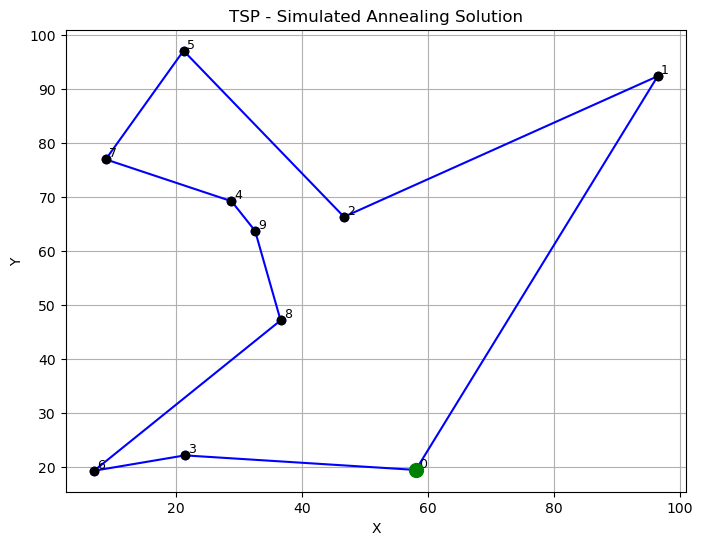

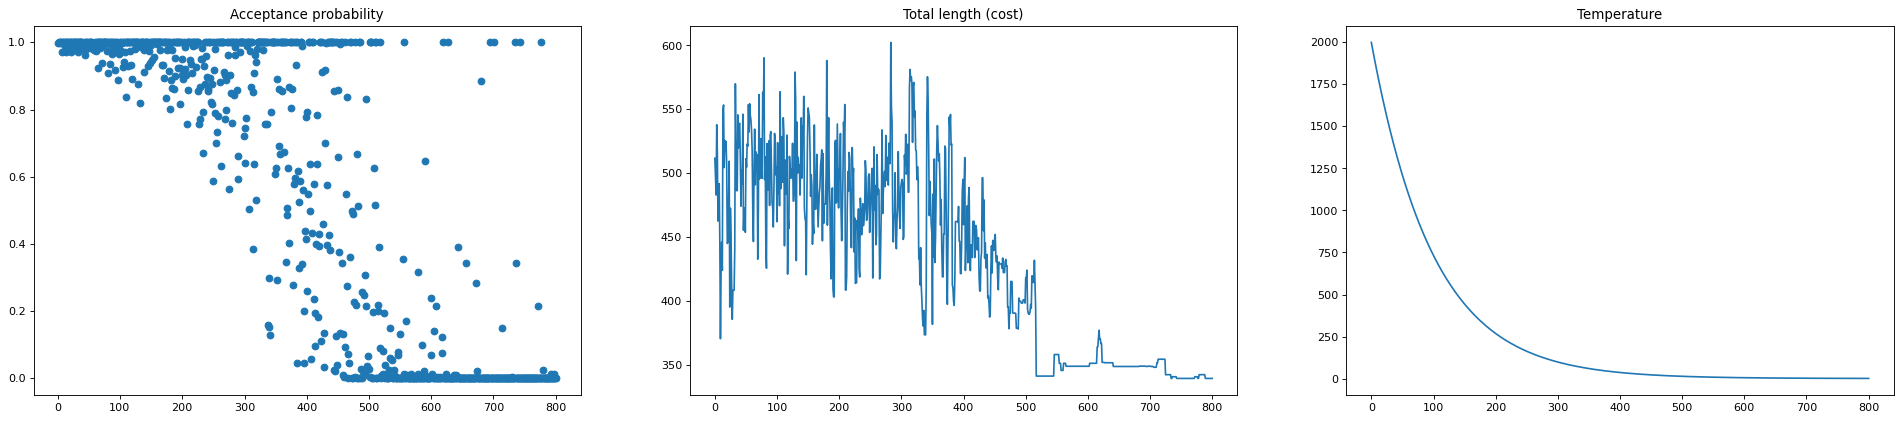

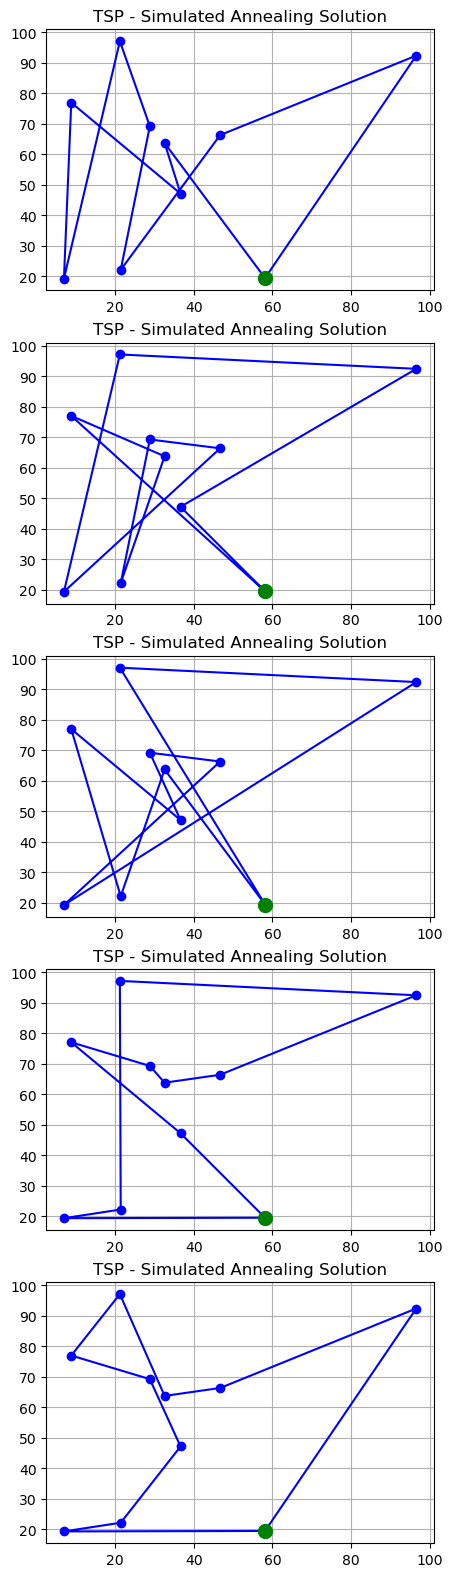

In [145]:
num_cities = 10
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.99, 2000, 800, 2)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand,show_iterations=False)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path)
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

Path: [0, 10, 11, 15, 8, 18, 14, 1, 13, 2, 16, 9, 4, 5, 12, 7, 19, 17, 6, 3, 0]
Total cost: 401.9591414275255
Time taken: 0.207783 seconds


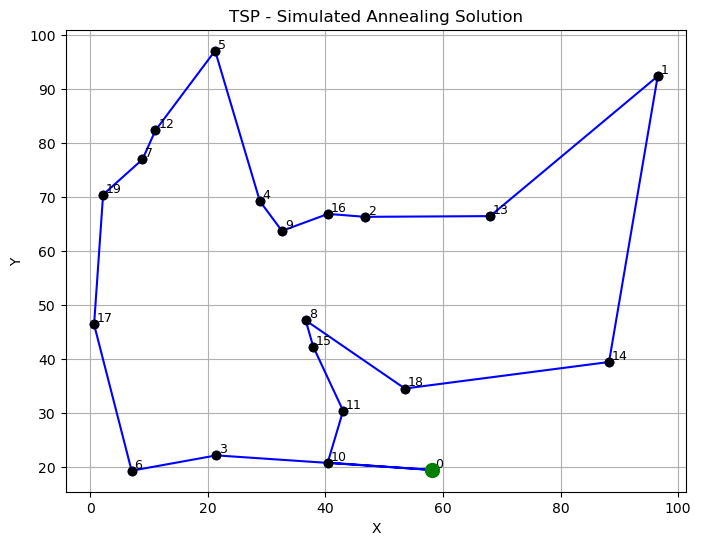

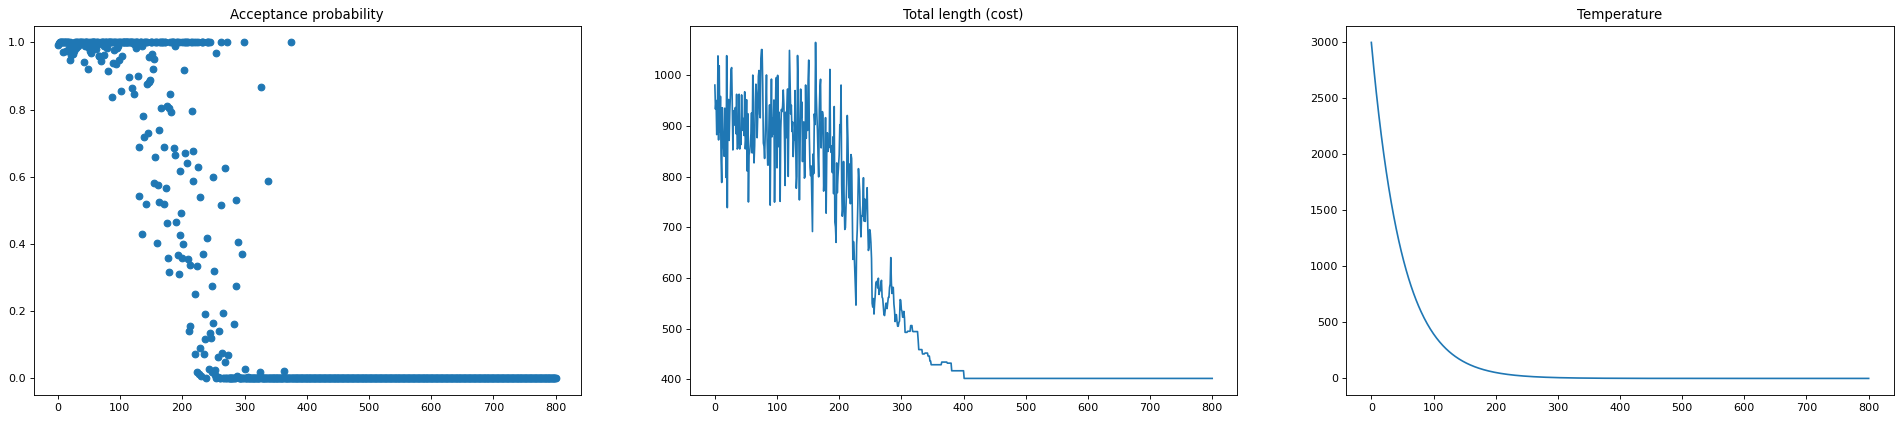

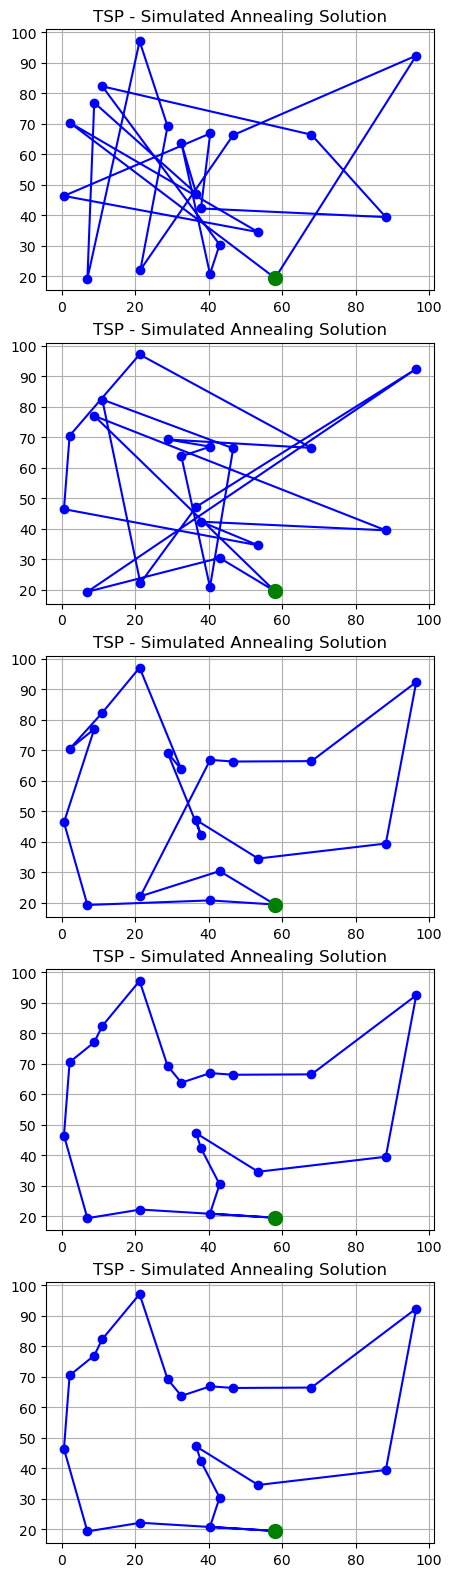

In [147]:
num_cities = 20
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.98, 3000, 800, 10)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path)
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

Path: [0, 18, 2, 16, 9, 4, 27, 5, 12, 7, 23, 19, 20, 17, 30, 29, 21, 22, 6, 3, 10, 11, 15, 8, 26, 13, 28, 33, 34, 1, 31, 25, 24, 14, 32, 0]
Total cost: 561.2691979522247
Time taken: 0.231938 seconds


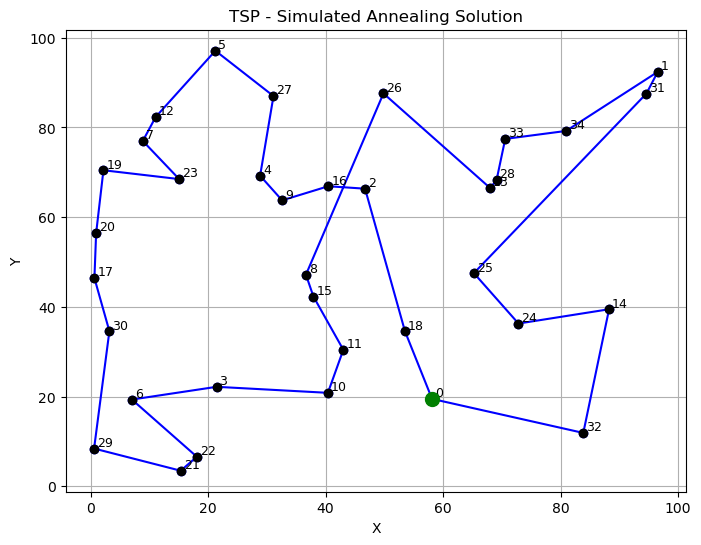

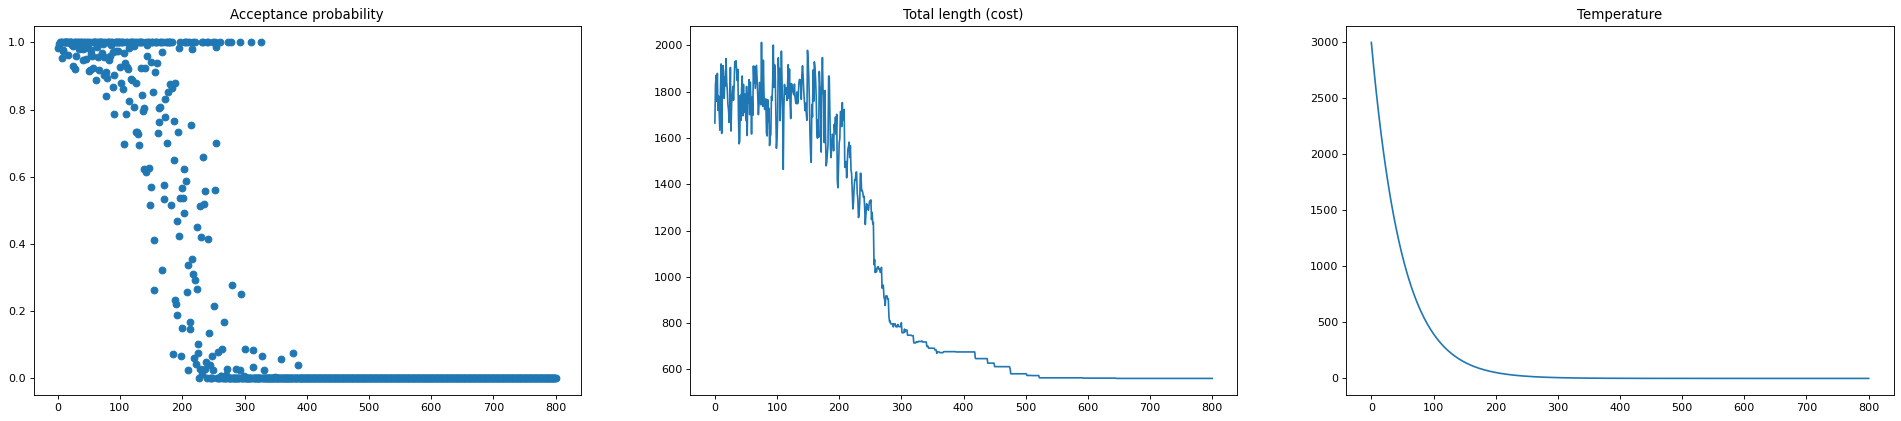

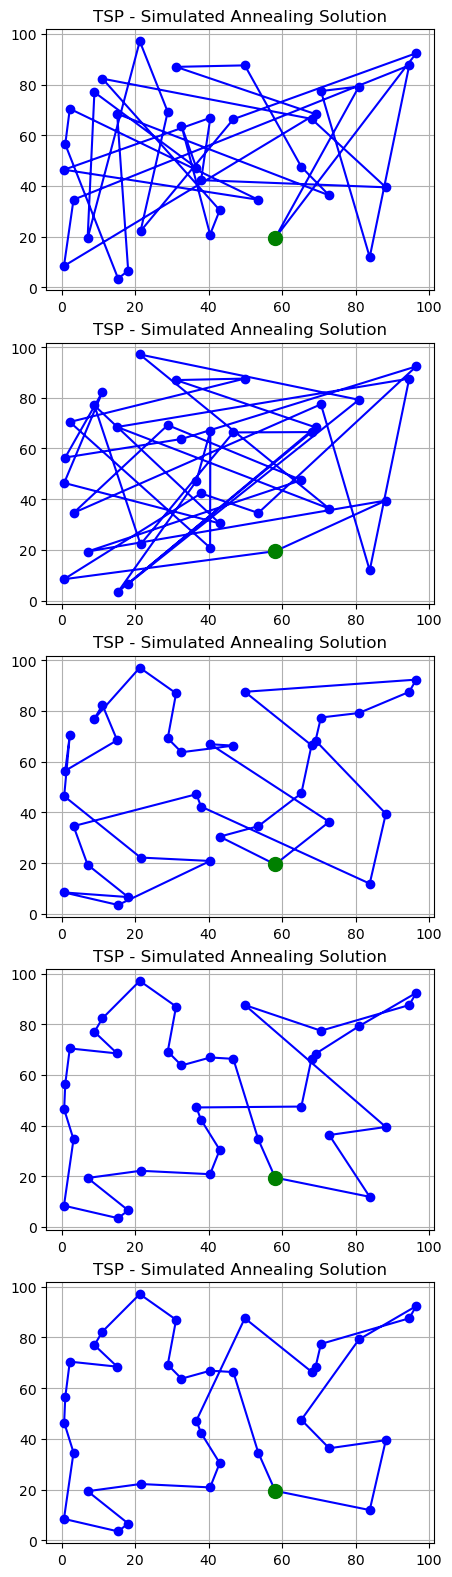

In [209]:
num_cities = 35
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.98, 3000, 800, 10)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path)
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

Path: [0, 42, 40, 18, 25, 13, 28, 41, 2, 26, 33, 36, 34, 1, 39, 31, 37, 14, 47, 38, 49, 32, 24, 10, 45, 3, 35, 22, 21, 29, 6, 30, 17, 20, 19, 44, 46, 5, 27, 43, 12, 7, 48, 23, 4, 9, 16, 8, 15, 11, 0]
Total cost: 680.5687947678713
Time taken: 1.184696 seconds


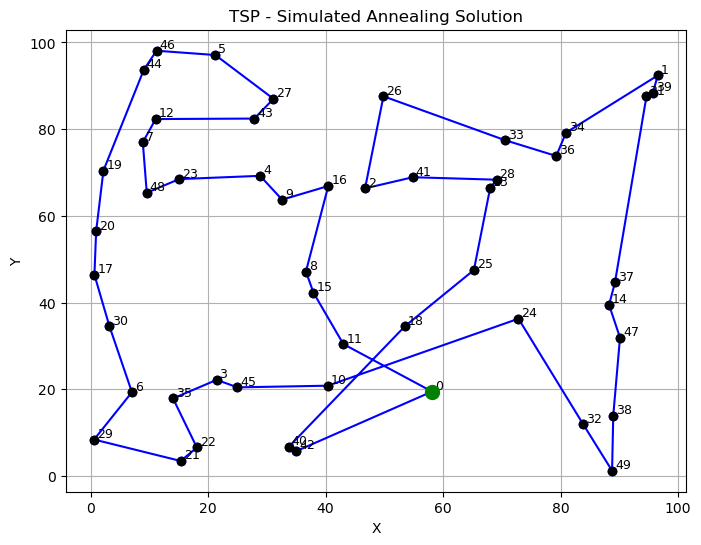

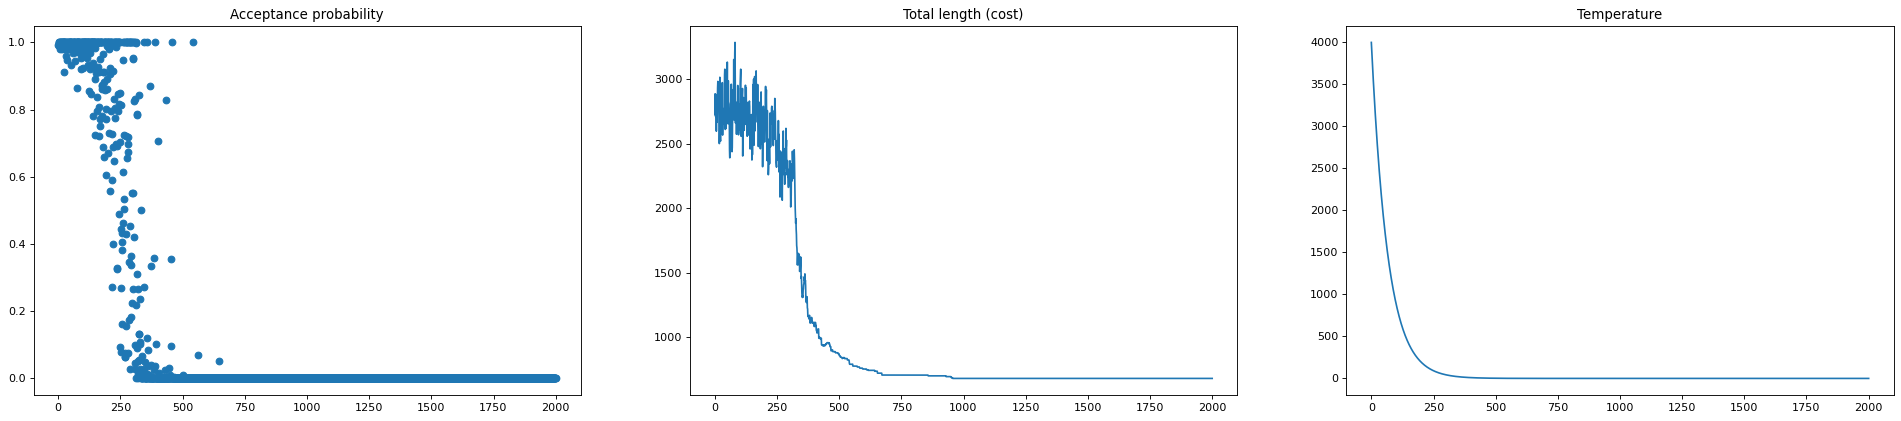

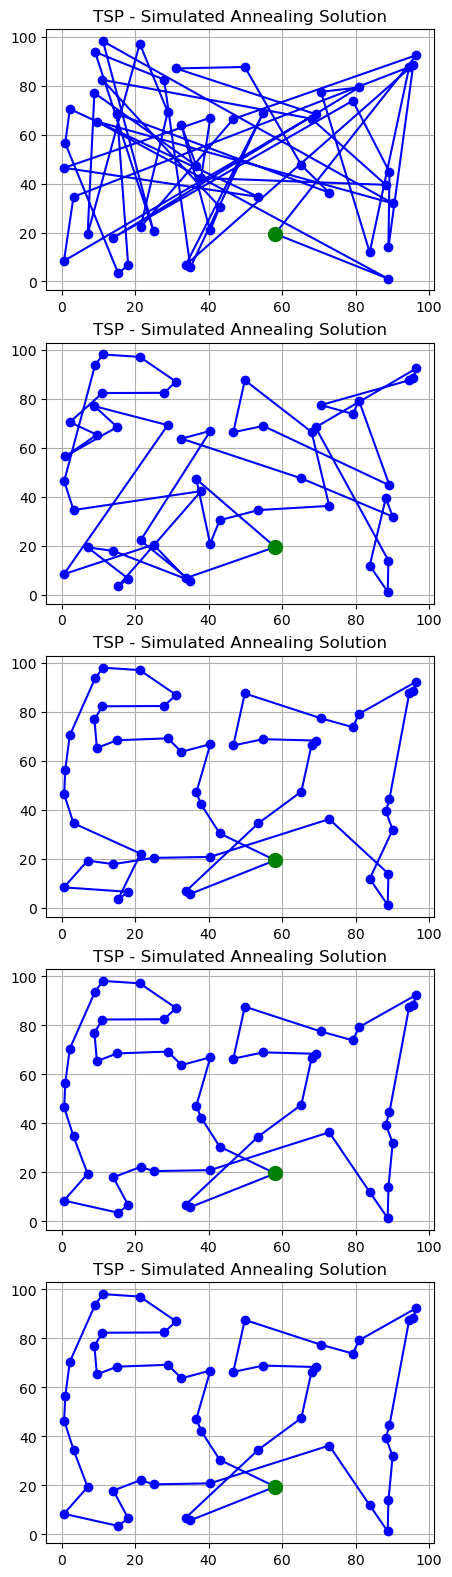

In [ ]:
num_cities = 50
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.985, 4000, 1000, 15)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path)
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

Path: [0, 11, 18, 13, 28, 33, 73, 50, 26, 41, 2, 51, 8, 61, 15, 68, 62, 36, 34, 31, 39, 1, 60, 30, 17, 20, 7, 12, 44, 70, 46, 5, 55, 27, 43, 4, 56, 66, 16, 54, 25, 63, 32, 49, 38, 52, 67, 72, 24, 47, 14, 57, 37, 74, 71, 64, 9, 53, 23, 19, 48, 65, 3, 45, 35, 58, 6, 59, 29, 21, 22, 69, 40, 42, 10, 0]
Total cost: 932.6165306071005
Time taken: 3.636649 seconds


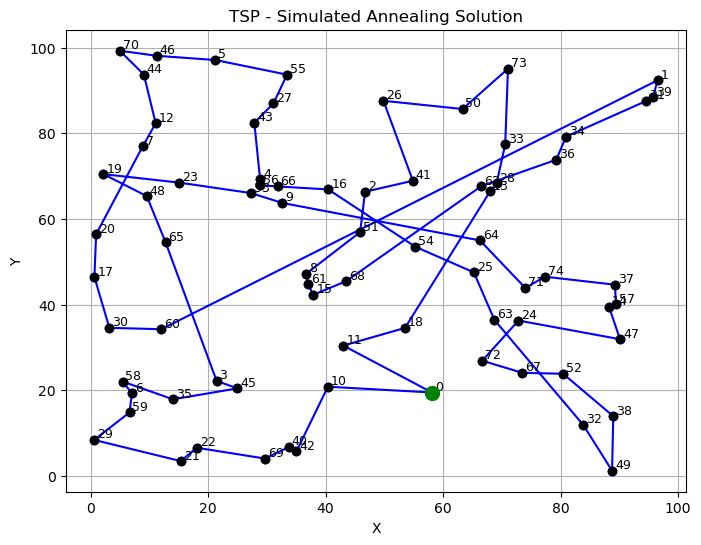

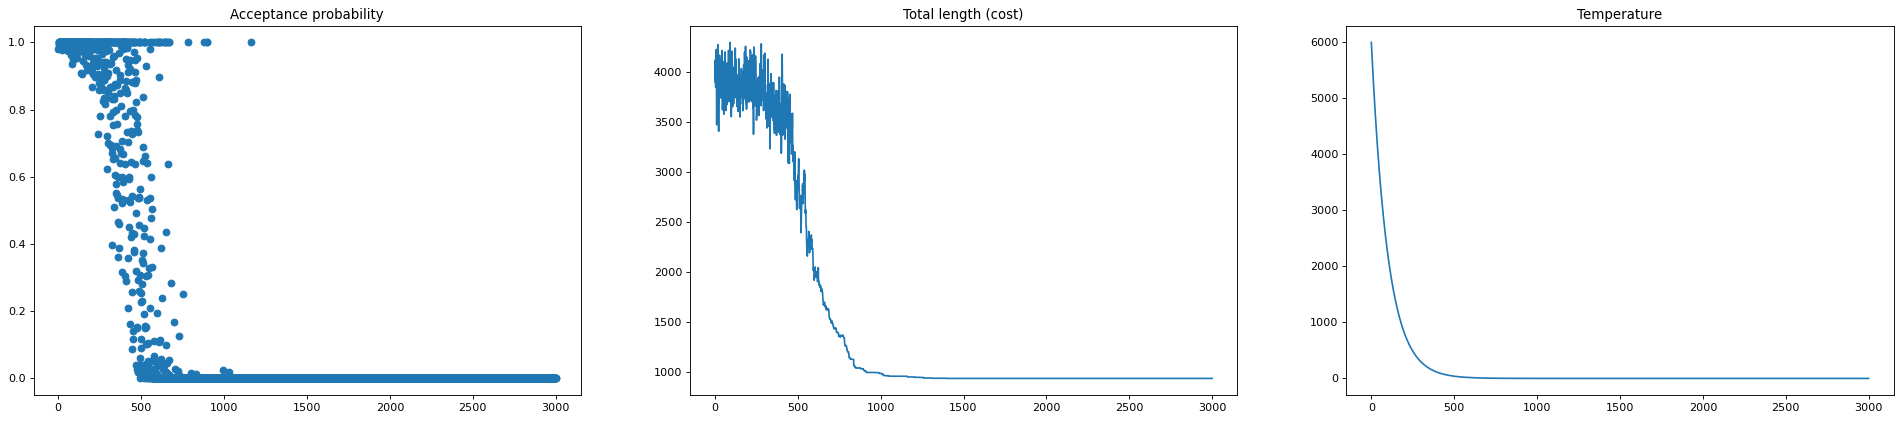

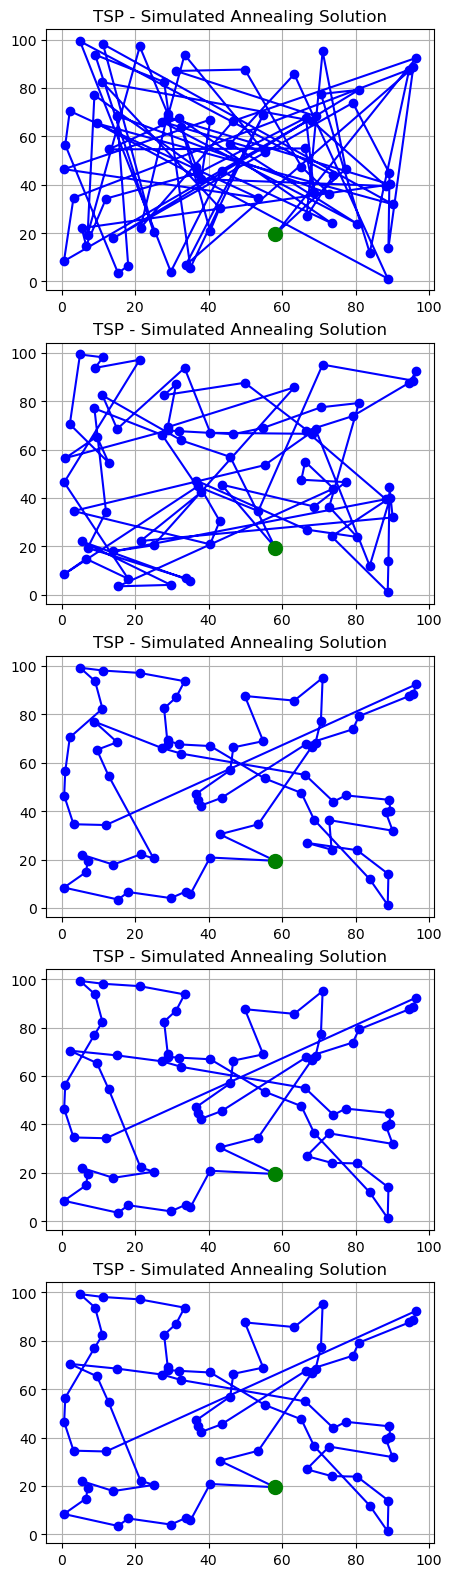

In [244]:
num_cities = 75
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.99, 6000, 3000, 20)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path)
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

Path: [0, 84, 32, 49, 38, 52, 47, 83, 41, 87, 7, 19, 80, 48, 20, 17, 76, 30, 88, 58, 6, 35, 3, 45, 86, 11, 77, 95, 10, 40, 69, 42, 92, 99, 78, 67, 24, 25, 54, 62, 13, 28, 33, 50, 91, 73, 94, 79, 34, 31, 39, 75, 1, 82, 96, 26, 55, 97, 27, 43, 5, 46, 70, 44, 12, 23, 65, 93, 60, 59, 29, 21, 22, 89, 9, 81, 53, 56, 4, 66, 16, 2, 51, 68, 8, 61, 15, 18, 63, 85, 71, 74, 14, 57, 37, 98, 36, 90, 64, 72, 0]
Total cost: 1045.283153055185
Time taken: 4.866595 seconds


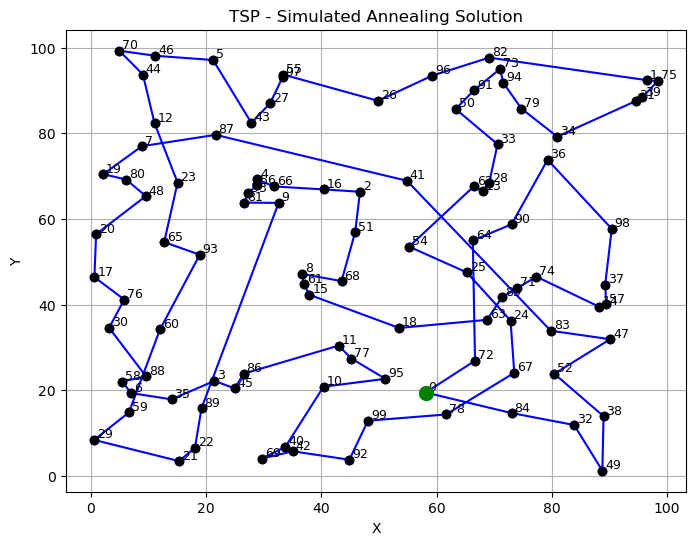

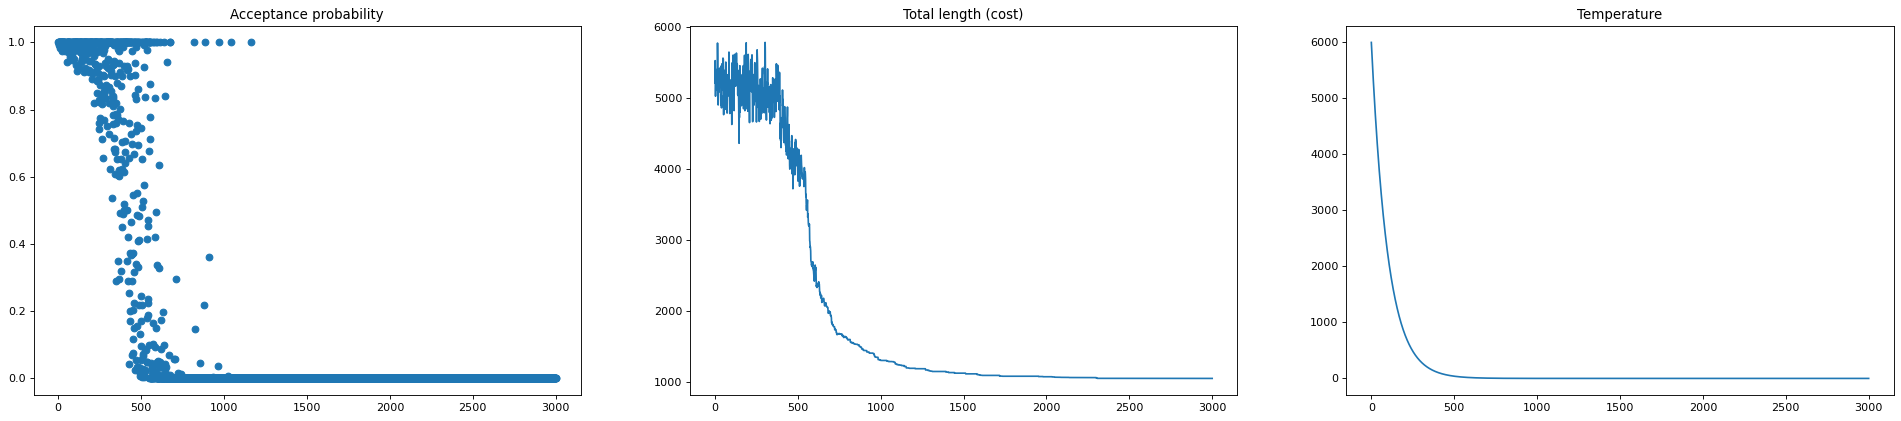

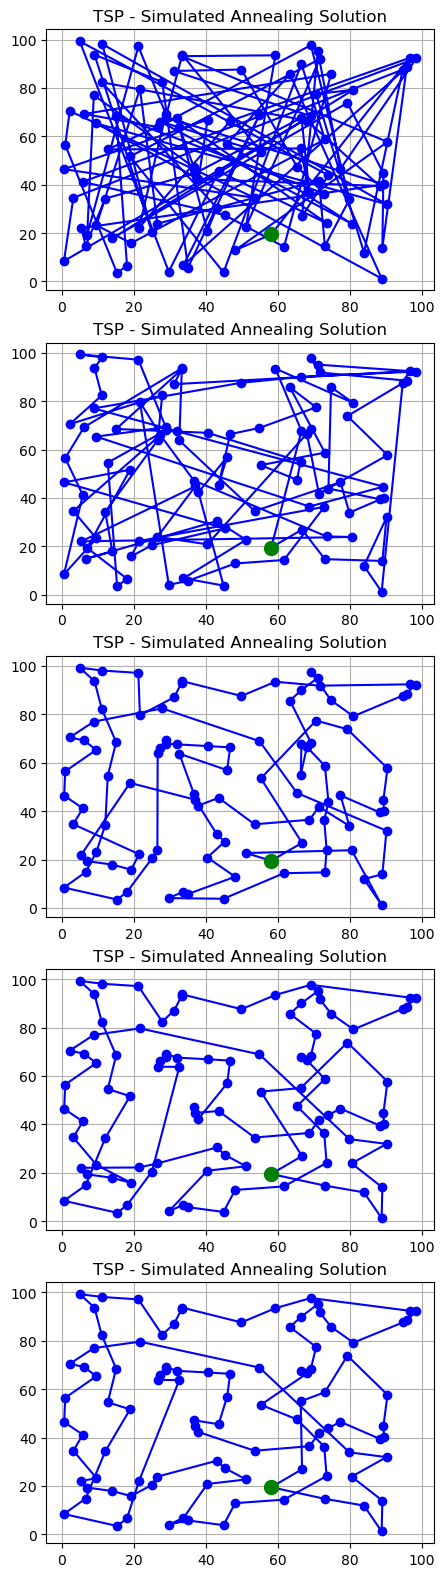

In [256]:
num_cities = 100
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.99, 6000, 3000, 20)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path)
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

### Generating a summary: times and cost function

In [6]:
# trials_per_size = 1
# results = []

# for num_cities in range(10, 101, 1):
#     times = []
#     lengths = []

#     for trial in range(trials_per_size):
#         random.seed(101)
#         coords = generate_coordinates(num_cities)
#         distance_matrix = compute_distance_matrix(coords)

#         (a, t_init, max_iter, num_cand) = (0.97, 100, 200, 100)
#         if num_cities <= 20:
#             (a, t_init, max_iter, num_cand) = (0.99, 200, 700, 200)
#         elif num_cities <= 35:
#             (a, t_init, max_iter, num_cand) = (0.992, 800, 900, 350)
#         else:
#             (a, t_init, max_iter, num_cand) = (0.997, 1000, 3000, 500)

#         start_time = time.time()
#         path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
#         end_time = time.time()

#         times.append(end_time - start_time)
#         lengths.append(cost)

#     results.append({
#         "Number of Cities": num_cities,
#         "Avg Total Length": sum(lengths) / trials_per_size,
#         "Avg Time (s)": sum(times) / trials_per_size
#     })


# df = pd.DataFrame(results)
# df
# # df.to_csv("sa_tsp_avg_results.csv", index=False)

In [258]:
trials_per_size = 5
results = []
seed=101

for num_cities in range(10, 101, 1):
    times = []
    lengths = []

    if num_cities <= 35:
        trials_per_size = 100
    else:
        trials_per_size = 5

    for trial in range(trials_per_size):
        random.seed(seed)
        seed += 10
        coords = generate_coordinates(num_cities)
        distance_matrix = compute_distance_matrix(coords)

        (a, t_init, max_iter, num_cand) = (None, None, None, None)
        if num_cities <= 10:
            (a, t_init, max_iter, num_cand) = (0.99, 2000, 800, 2)
        elif 10 < num_cities <= 35:
            (a, t_init, max_iter, num_cand) = (0.98, 3000, 800, 10)
        elif 35 < num_cities <= 50:
            (a, t_init, max_iter, num_cand) = (0.985, 4000, 1000, 15)
        else:
            (a, t_init, max_iter, num_cand) = (0.99, 6000, 3000, 20)

        start_time = time.time()
        path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
        end_time = time.time()

        # times.append(end_time - start_time)
        # lengths.append(cost)

        new_row = {
            "Number of Cities": num_cities,
            "Total Length": cost,
            "Time (s)": end_time - start_time
        }
        print(new_row)
        results.append(new_row)


df = pd.DataFrame(results)
df

{'Number of Cities': 10, 'Total Length': 339.42125551611485, 'Time (s)': 0.022396087646484375}
{'Number of Cities': 10, 'Total Length': 246.62258286684423, 'Time (s)': 0.023864030838012695}
{'Number of Cities': 10, 'Total Length': 293.216518593057, 'Time (s)': 0.02217245101928711}
{'Number of Cities': 10, 'Total Length': 224.00258318836765, 'Time (s)': 0.021809101104736328}
{'Number of Cities': 10, 'Total Length': 265.69755685631594, 'Time (s)': 0.022750377655029297}
{'Number of Cities': 10, 'Total Length': 278.949787999856, 'Time (s)': 0.02600860595703125}
{'Number of Cities': 10, 'Total Length': 253.12914679574823, 'Time (s)': 0.02394723892211914}
{'Number of Cities': 10, 'Total Length': 319.30140768519203, 'Time (s)': 0.02359294891357422}
{'Number of Cities': 10, 'Total Length': 298.77184054662365, 'Time (s)': 0.024423599243164062}
{'Number of Cities': 10, 'Total Length': 247.57916408515828, 'Time (s)': 0.024528980255126953}
{'Number of Cities': 10, 'Total Length': 246.5533295237559

Number of Cities  Total Length  Time (s)
0                   10    339.421256  0.022396
1                   10    246.622583  0.023864
2                   10    293.216519  0.022172
3                   10    224.002583  0.021809
4                   10    265.697557  0.022750
...                ...           ...       ...
2920               100   1233.630767  6.066221
2921               100   1247.240888  5.329775
2922               100   1385.513812  5.253959
2923               100   1215.882510  6.702246
2924               100   1266.738605  5.957841

[2925 rows x 3 columns]

In [259]:
df.to_csv("sa_tsp_results.csv", index=False)

In [18]:
# plt.figure(figsize=(10, 5))
# # plt.plot(df["Number of Cities"], df["Avg Time (s)"], marker='o')
# plt.scatter(df["Number of Cities"], df["Time (s)"])
# # plt.plot(df["Number of Cities"], df["Time (s)"])
# plt.title("Execution Time vs Number of Cities")
# plt.xlabel("Number of Cities")
# plt.ylabel("Time (seconds)")
# plt.grid(True)
# # plt.savefig("sa_tsp_avg_time.png", dpi=100, bbox_inches='tight')

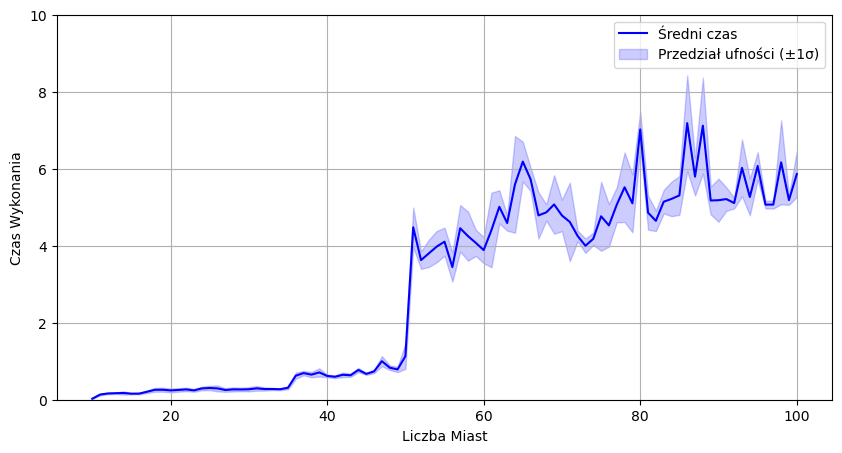

In [261]:
grouped = df.groupby("Number of Cities")["Time (s)"]
mean_time = grouped.mean()
std_time = grouped.std()

# X i Y
x = mean_time.index
y = mean_time.values
yerr = std_time.values

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Średni czas", color='blue')
plt.fill_between(x, y - yerr, y + yerr, color='blue', alpha=0.2, label="Przedział ufności (±1σ)")

# plt.title("Czas Wykonania a Liczba Miast")
plt.xlabel("Liczba Miast")
plt.ylabel("Czas Wykonania")
plt.grid(True)
plt.legend()
plt.ylim(0, 10)
plt.savefig(".\images\sa_tsp_time.png", dpi=100, bbox_inches='tight')
plt.show()


In [20]:
# plt.figure(figsize=(10, 5))
# # plt.plot(df["Number of Cities"], df["Avg Total Length"], marker='o', color='orange')
# plt.scatter(df["Number of Cities"], df["Total Length"])
# plt.title("Total lenght vs number of cities")
# plt.xlabel("Number of Cities")
# plt.ylabel("Tour Length")
# plt.grid(True)
# # plt.savefig("sa_tsp_avg_length.png", dpi=100, bbox_inches='tight')

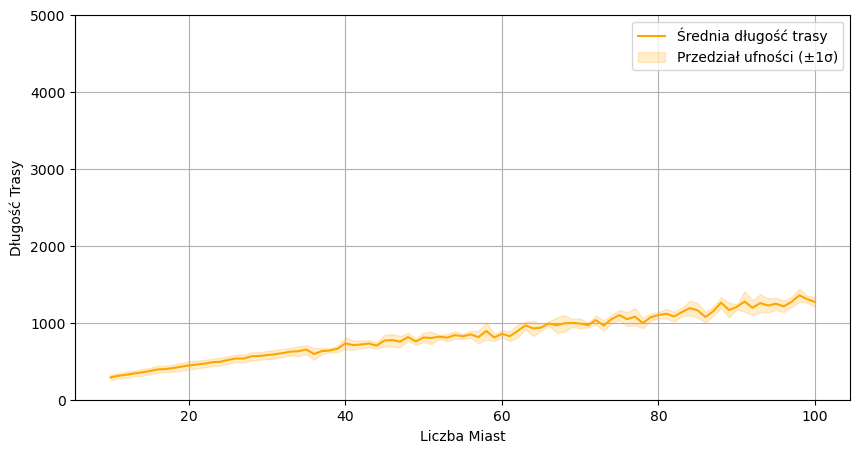

In [262]:
grouped = df.groupby("Number of Cities")["Total Length"]
mean_length = grouped.mean()
std_length = grouped.std()

# X i Y
x = mean_length.index
y = mean_length.values
yerr = std_length.values

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Średnia długość trasy", color='orange')
plt.fill_between(x, y - yerr, y + yerr, color='orange', alpha=0.2, label="Przedział ufności (±1σ)")

# plt.title("Całkowita Długość Trasy a Liczba Miast")
plt.xlabel("Liczba Miast")
plt.ylabel("Długość Trasy")
plt.grid(True)
plt.legend()
plt.ylim(0, 5000)
plt.savefig(".\images\sa_tsp_length.png", dpi=100, bbox_inches='tight')
plt.show()


In [ ]:
num_cities = 50
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

In [188]:
path_hist, cost_hist, t_hist, A_hist, path_best, cost_best = simulated_annealing_tsp(distance_matrix, a=0.998, t_init=1000, max_iter=5000, num_cand=500)

Iteration 0: cost function =  2452.73, temperature =  998.00, activation =  1.00.
Iteration 1: cost function =  2470.02, temperature =  996.00, activation =  0.98.
Iteration 2: cost function =  2436.85, temperature =  994.01, activation =  1.00.
Iteration 3: cost function =  2381.78, temperature =  992.02, activation =  1.00.
Iteration 4: cost function =  2455.68, temperature =  990.04, activation =  0.93.
Iteration 5: cost function =  2426.98, temperature =  988.06, activation =  1.00.
Iteration 6: cost function =  2356.45, temperature =  986.08, activation =  1.00.
Iteration 7: cost function =  2460.53, temperature =  984.11, activation =  0.90.
Iteration 8: cost function =  2472.57, temperature =  982.14, activation =  0.99.
Iteration 9: cost function =  2317.72, temperature =  980.18, activation =  1.00.
Iteration 10: cost function =  2378.66, temperature =  978.22, activation =  0.94.
Iteration 11: cost function =  2375.47, temperature =  976.26, activation =  1.00.
Iteration 12: 

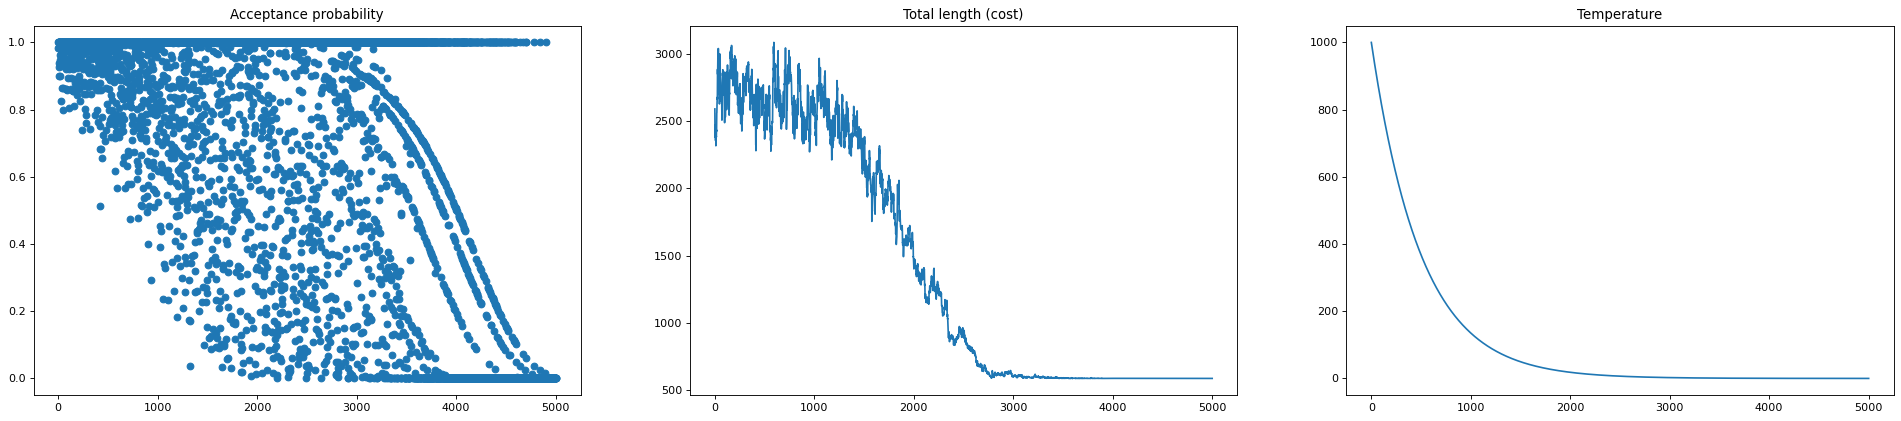

In [189]:
plt.figure(figsize=(30, 6), dpi=80)

#plot 1:
plt.subplot(1, 3, 1)
plt.scatter([x for x in range(len(A_hist))], A_hist)
plt.title("Acceptance probability")

#plot 2:
plt.subplot(1, 3, 2)
plt.plot([_ for _ in range(len(cost_hist))], cost_hist)
plt.title("Total length (cost)")

#plot 3:
plt.subplot(1, 3, 3)
plt.plot([_ for _ in range(len(t_hist))], t_hist)
plt.title("Temperature")

plt.show()

Path: [0, 24, 14, 1, 13, 11, 10, 15, 8, 9, 23, 3, 22, 21, 6, 17, 20, 19, 7, 12, 5, 4, 16, 2, 18, 0]
Total cost: 510.9337891268983
Time taken: 0.296983 seconds


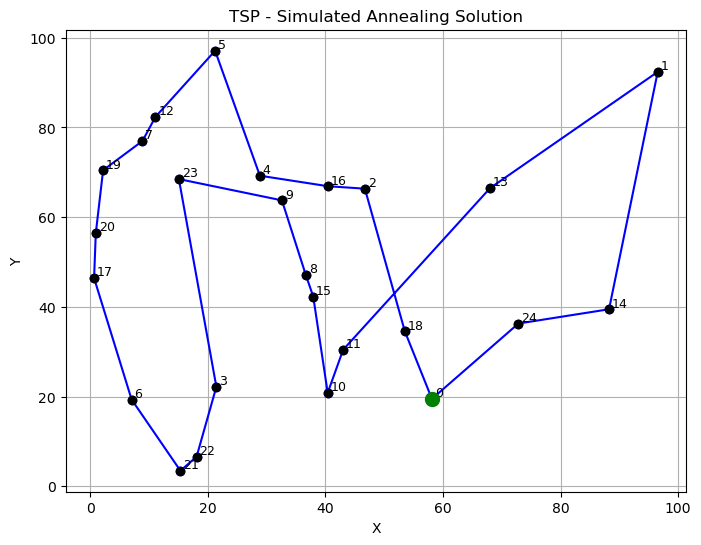

In [264]:
num_cities = 25
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a=0.98, t_init=3000, max_iter=800, num_cand=10)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, r".\images\25_SA.png")

Path: [0, 42, 40, 18, 25, 13, 28, 41, 2, 26, 33, 36, 34, 1, 39, 31, 37, 14, 47, 38, 49, 32, 24, 10, 45, 3, 35, 22, 21, 29, 6, 30, 17, 20, 19, 44, 46, 5, 27, 43, 12, 7, 48, 23, 4, 9, 16, 8, 15, 11, 0]
Total cost: 680.5687947678713
Time taken: 0.714209 seconds


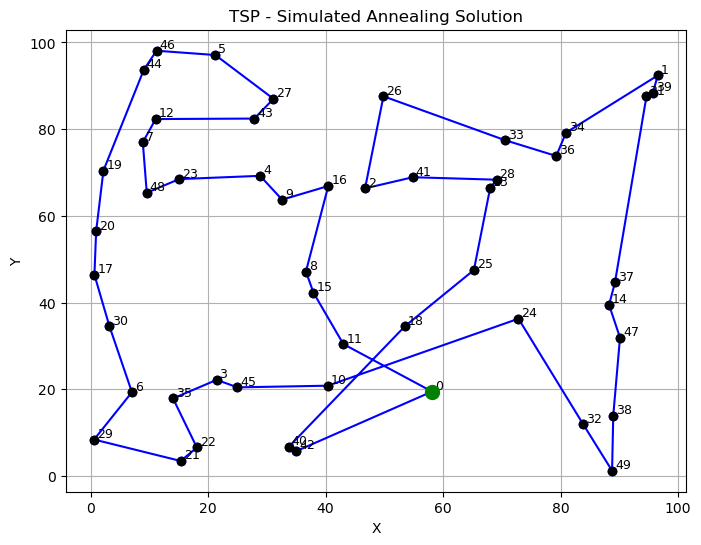

In [263]:
num_cities = 50
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a=0.985, t_init=4000, max_iter=1000, num_cand=15)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, r".\images\50_SA.png")

Iteration 0: cost function =  2745.05, temperature =  998.00, activation =  0.89.
Iteration 1: cost function =  2684.14, temperature =  996.00, activation =  1.00.
Iteration 2: cost function =  2608.97, temperature =  994.01, activation =  1.00.
Iteration 3: cost function =  2717.11, temperature =  992.02, activation =  0.90.
Iteration 4: cost function =  2669.13, temperature =  990.04, activation =  1.00.
Iteration 5: cost function =  2729.94, temperature =  988.06, activation =  0.94.
Iteration 6: cost function =  2737.89, temperature =  986.08, activation =  0.99.
Iteration 7: cost function =  2617.37, temperature =  984.11, activation =  1.00.
Iteration 8: cost function =  2551.30, temperature =  982.14, activation =  1.00.
Iteration 9: cost function =  2452.46, temperature =  980.18, activation =  1.00.
Iteration 10: cost function =  2457.09, temperature =  978.22, activation =  1.00.
Iteration 11: cost function =  2466.23, temperature =  976.26, activation =  0.99.
Iteration 12: 

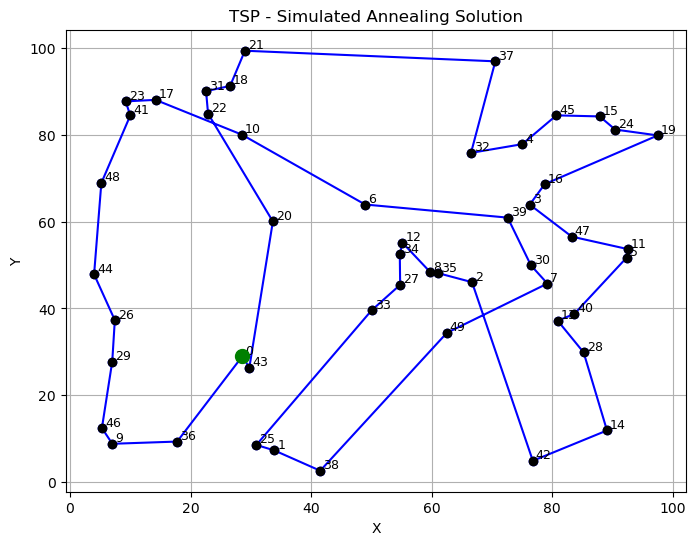

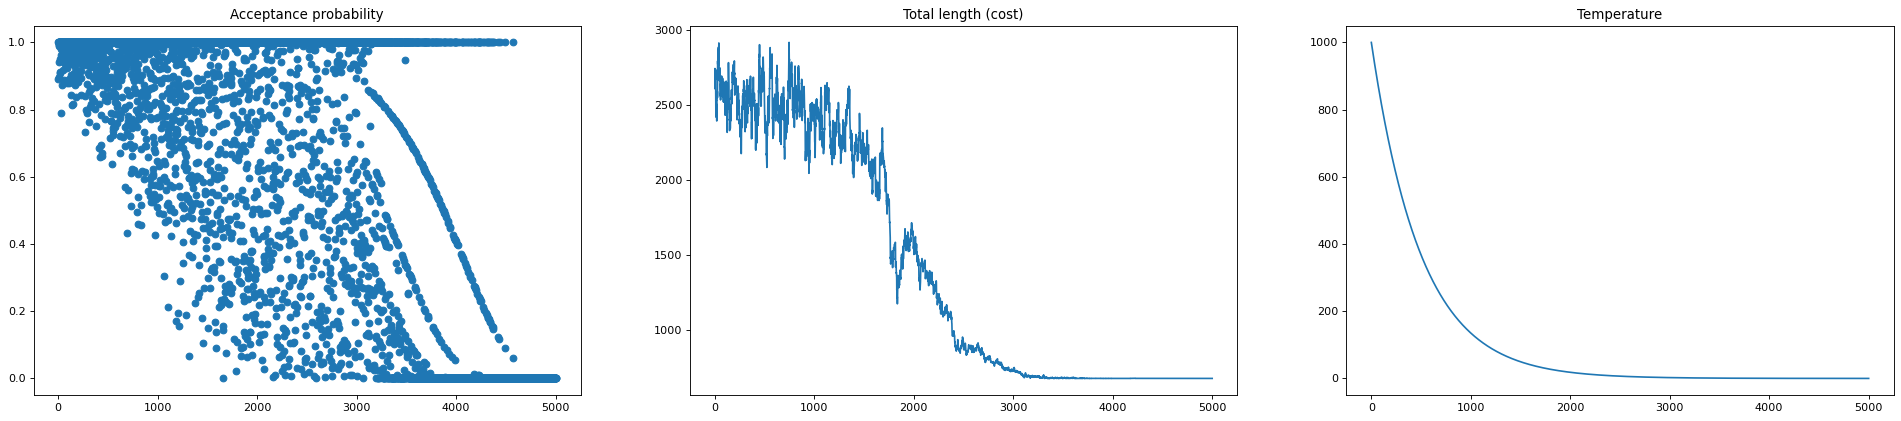

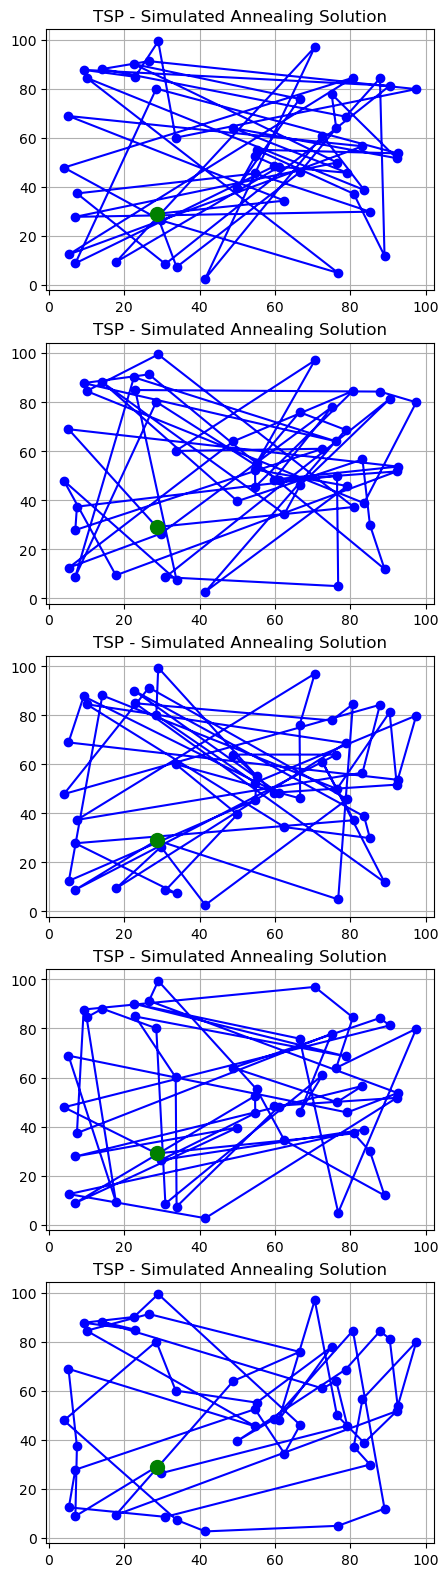

In [117]:
num_cities = 50
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a=0.998, t_init=1000, max_iter=5000, num_cand=500, show_iterations=True)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)